In [12]:
import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
import numpy as np

## GeneralizedRCNNTransform

In [81]:
t = models.detection.transform.GeneralizedRCNNTransform(min_size=600, 
                                                        max_size=800, 
                                                        # fixed_size=(640, 640), 
                                                        image_mean=[0, 0, 0],
                                                        image_std=[1, 1, 1],
                                                        size_divisible=32)

In [86]:
im = Image.open('../000000000575.jpg')
im1 = im.resize(im.size[::-1])

print(im.size, im1.size)

im = transforms.ToTensor()(im)
im1 = transforms.ToTensor()(im1)

images, _ = t([im, im1])

(640, 513) (513, 640)


In [87]:
print(images.tensors.shape)
print(images.image_sizes)

torch.Size([2, 3, 768, 768])
[(600, 748), (748, 600)]


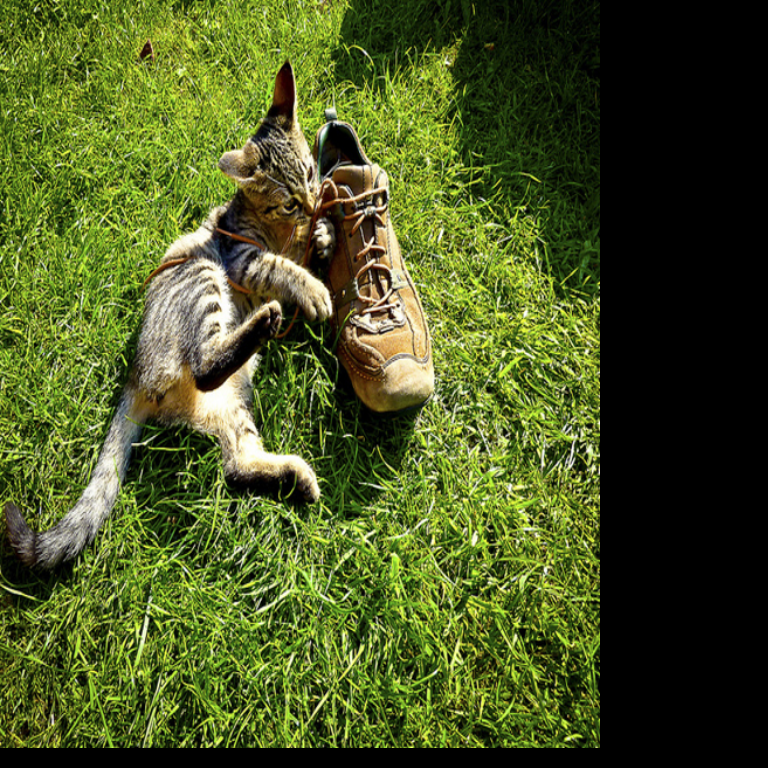

In [88]:
transforms.ToPILImage()(images.tensors[1])

## DRAW

In [1]:
import torch
import torchvision
import numpy as np

from coco_utils import get_coco_dataset
from transforms import ToTensor

In [2]:
dataset = get_coco_dataset(root='/Users/lvwenyu01/Desktop/workspace/dataset/coco/',
                           img_folder='train2017/',
                           ann_file='annotations/instances_train2017_rand8.json',
                           transforms=None)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


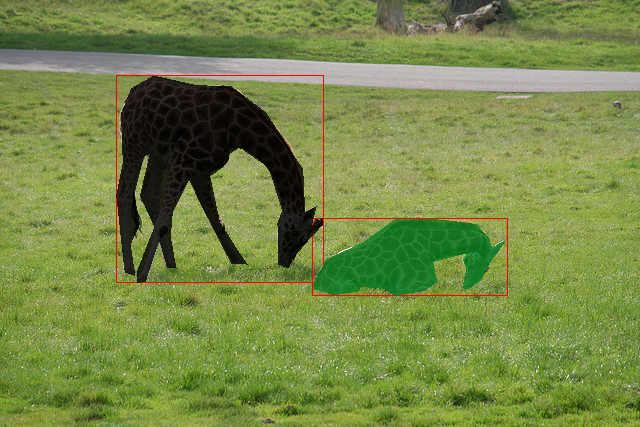

In [3]:
im = (torchvision.transforms.ToTensor()(dataset[1][0]) * 255).to(torch.uint8)
im = torchvision.utils.draw_bounding_boxes(im, dataset[1][1]['boxes'], colors='red')
im = torchvision.utils.draw_segmentation_masks(im, dataset[1][1]['masks'].to(torch.bool),)

torchvision.transforms.ToPILImage()(im)